In [1]:
%load_ext autoreload
%autoreload 2

import nolearn.lasagne.visualize 

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
from stats import Stats

mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


Loaded /home/d/patches//cylinder1/ in 0.00133299827576 seconds.
Using test set: ['image', 'prob', 'merged_array', 'border_overlap']

Precision/Recall:
             precision    recall  f1-score   support

          0       0.94      0.87      0.90     13408
          1       0.88      0.94      0.91     13408

avg / total       0.91      0.90      0.90     26816

Test Accuracy: 0.904609188544
Accuracy Score: 0.904609188544


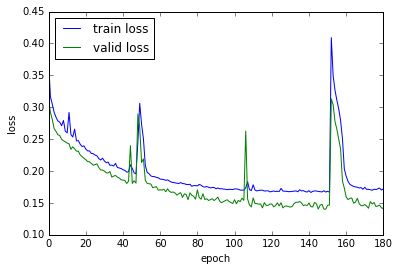

In [3]:
cnn1 = '/home/d/nets/MergeNetDropout_cylinder1_border_overlap_dropout_usevars/net.p'
cnn2 = '/home/d/nets/MergeNetDropout_cylinder1_larger_border_overlap_dropout_usevars/net.p'
cnn3 = '/home/d/nets/MergeNetThreeLegDropout_cylinder1_larger_border_overlap_dropout_usevars/net.p'

cnn, loss_plot = Stats.load_cnn(cnn1)

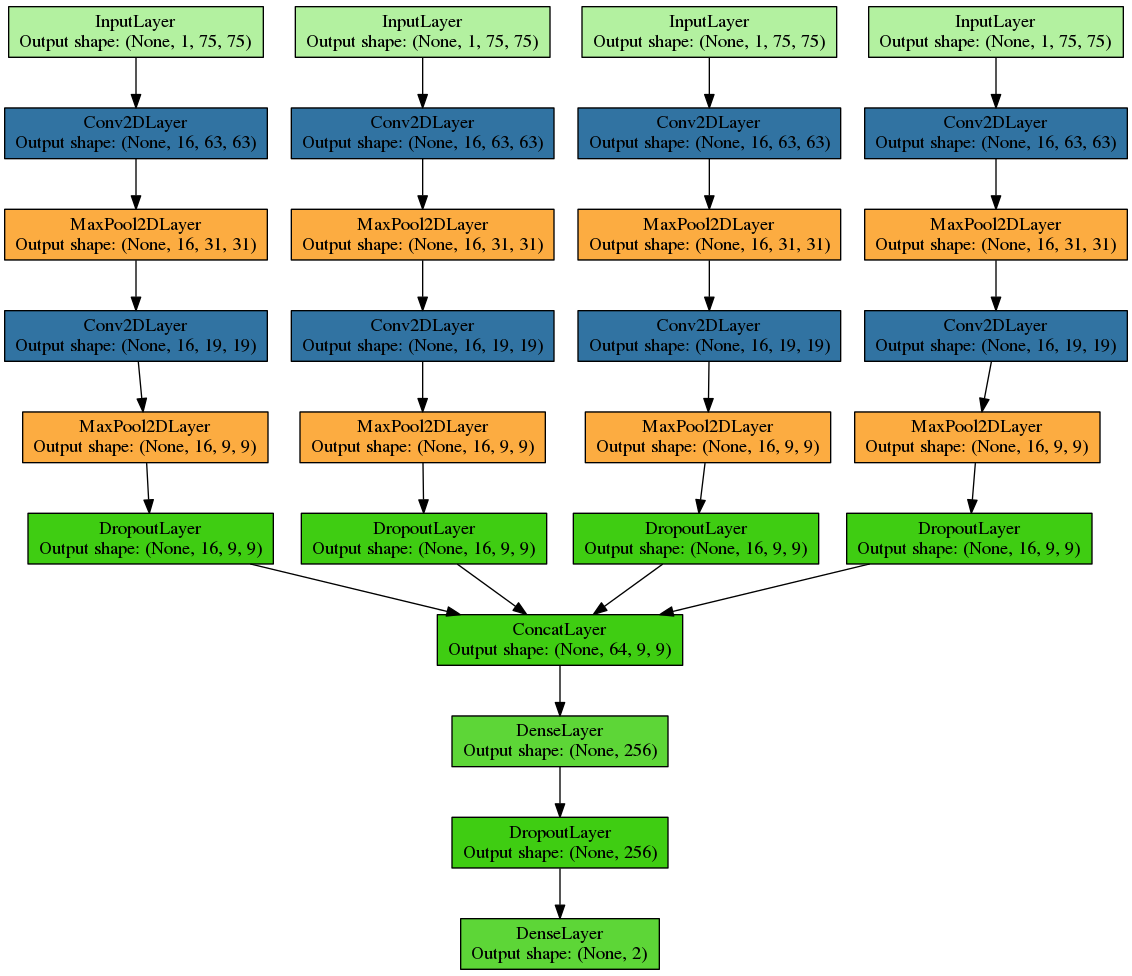

In [ ]:
nolearn.lasagne.visualize.draw_to_notebook(cnn)

In [ ]:
me = Stats.run_dojo_xp(cnn)

Loading merge errors from file..
12  merge errors found.

Correcting merge errors with p < .05
   Median VI improvement -0.00100757586812
Correcting split errors with p > .95


10

In [25]:
import mlproof as mlp

In [98]:
    input_image, input_prob, input_gold, input_rhoana, dojo_bbox = mlp.Legacy.read_dojo_data()


In [29]:
a,b,c,d,e,f,g,h,i = mlp.Legacy.get_merge_error_image(input_image[0], input_rhoana[0], 17, me[0][3][0][1])        